# Overview
This notebook is mainly for testing the stability of the $T^2$ statistic.

1. What happens when the test locations/frequencies are the same?
2. What is the effect on the test if the test locations are redundant? Will the test statistic blow up?

In [209]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import freqopttest.util as util
import freqopttest.data as data
import freqopttest.kernel as kernel
import freqopttest.tst as tst
import freqopttest.glo as glo
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import sys

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [210]:
# sample source 
m = 500
dim = 2
n = m
#ss = data.SSGaussMeanDiff(dim, my=0.2)
ss = data.SSBlobs()
tst_data = ss.sample(m, seed=2)
tr, te = tst_data.split_tr_te(tr_proportion=0.5, seed=10)

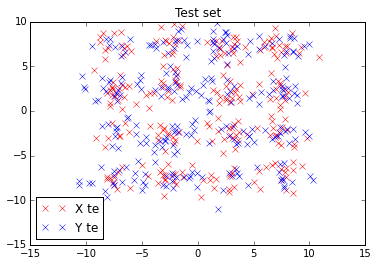

In [211]:
# plot test data
xte, yte = te.xy()
plt.plot(xte[:, 0], xte[:, 1], 'xr', label='X te')
plt.plot(yte[:, 0], yte[:, 1], 'xb', label='Y te')
plt.legend(loc='best')
plt.title('Test set')


In [212]:
print(te)

E[x] = [ 0.4511  0.3074] 
E[y] = [-0.0652  0.0592] 
Std[x] = [ 5.5046  5.5323] 
Std[y] = [ 5.6875  5.5402] 



## mean embedding test. J=2 locations

In [213]:
# test locations
T = np.array([[0, 0], [1, 0]])
gwidth = 1.0
alpha = 0.01
met = tst.MeanEmbeddingTest(T, gwidth, alpha)
met.perform_test(te)

{'alpha': 0.01,
 'h0_rejected': False,
 'pvalue': 0.078470702319533861,
 'test_stat': 5.0900598854334156}

In [214]:
t1 = np.array([0, 0])
t2x_list = np.linspace(-7, 7, 200)
# add an x very close to 0
t2x_list = np.append(t2x_list, [1e-9])
t2x_list.sort()
stats = np.zeros(len(t2x_list))
for i, t2x in enumerate(t2x_list):
    t2 = np.array([t2x, 0])
    T = np.vstack((t1, t2))
    met_i = tst.MeanEmbeddingTest(T, gwidth, alpha)
    test_i = met_i.perform_test(te)
    stats[i] = test_i['test_stat']
    

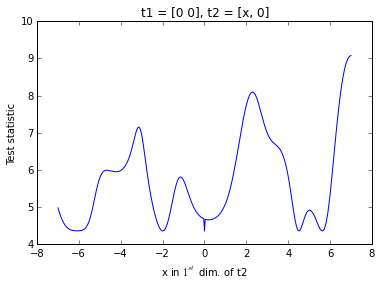

In [215]:
# plot location shift vs. test stat
plt.plot(t2x_list, stats)
plt.title('t1 = %s, t2 = [x, 0]'%(str(t1)) )
plt.xlabel('x in $1^{st}$ dim. of t2')
plt.ylabel('Test statistic')

This showed that if both the test locations are the same at [0, 0], then the covariance matrix is singular, and the test statistic cannot be computed. If $t_1 = [0, 0], t_2 = [x, 0]$ where $x$ approaches 0,  then test statistic drops significantly as shown.

## mean embedding test. J=3 locations

In [216]:
t1 = np.array([0, 0])
t3 = np.array([1, 0])
t2x_list = np.linspace(-7, 8, 200)
# add an x very close to 0
t2x_list = np.append(t2x_list, [1e-12, 1+1e-9])
t2x_list.sort()
stats = np.zeros(len(t2x_list))
for i, t2x in enumerate(t2x_list):
    t2 = np.array([t2x, 0])
    T = np.vstack((t1, t2, t3))
    met_i = tst.MeanEmbeddingTest(T, gwidth, alpha)
    test_i = met_i.perform_test(te)
    stats[i] = test_i['test_stat']
    

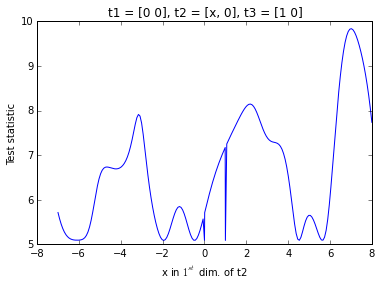

In [217]:
# plot location shift vs. test stat
plt.plot(t2x_list, stats)
plt.title('t1 = %s, t2 = [x, 0], t3 = %s'%(str(t1), str(t3)) )
plt.xlabel('x in $1^{st}$ dim. of t2')
plt.ylabel('Test statistic')

Same story as in the previous case of $J=2$. That is, there is a singularity at each point where two test locations are the same.